<a href="https://colab.research.google.com/github/neowalter/AIGAI/blob/main/personality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!wget 'https://github.com/tejaspradhan/Personality-Trait-Analysis-using-NLP-and-Deep-Learning/raw/master/mbti_data.zip'


--2023-10-10 03:36:28--  https://github.com/tejaspradhan/Personality-Trait-Analysis-using-NLP-and-Deep-Learning/raw/master/mbti_data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tejaspradhan/Personality-Trait-Analysis-using-NLP-and-Deep-Learning/master/mbti_data.zip [following]
--2023-10-10 03:36:28--  https://raw.githubusercontent.com/tejaspradhan/Personality-Trait-Analysis-using-NLP-and-Deep-Learning/master/mbti_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25621004 (24M) [application/zip]
Saving to: ‘mbti_data.zip.1’

mbti_data.zip.1     100%[===================>]  24.43M   

In [8]:
!ls


mbti_data.zip  sample_data


In [9]:
!unzip mbti_data.zip -d mbti_data


Archive:  mbti_data.zip
  inflating: mbti_data/mbti_1.csv    


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk

df = pd.read_csv(r'/content/mbti_data/mbti_1.csv')
# converting all to lower case
df['posts'] = [i.lower() for i in df['posts']]
df['posts'].head()

0    'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1    'i'm finding the lack of me in these posts ver...
2    'good one  _____   https://www.youtube.com/wat...
3    'dear intp,   i enjoyed our conversation the o...
4    'you're fired.|||that's another silly misconce...
Name: posts, dtype: object

<Axes: xlabel='type'>

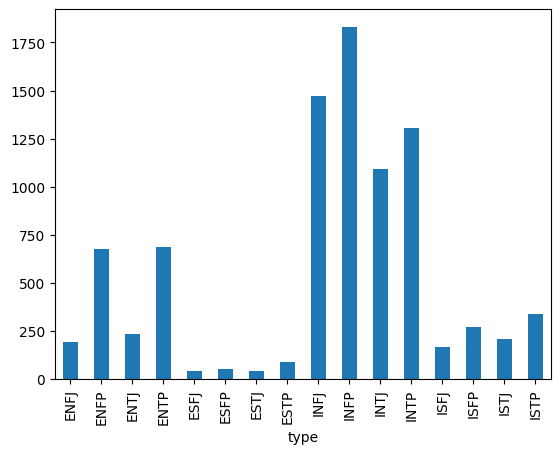

In [11]:
no_groups = df.groupby('type').count()
no_groups['posts'].plot(kind= 'bar')

In [12]:
df['Distinct Posts'] = [i.split('|||') for i in df['posts']]
df['Number of posts'] = df['Distinct Posts'].apply(len)
df.drop('Distinct Posts',inplace=True,axis=1)
df = df[df['Number of posts']==50]
#removing urls
df['Posts']= df['posts'].apply(lambda x: re.sub(r'https?:[?:A-Za-z0-9//_?.=/-]+', '', x.replace('|','')))
#keeping the end of strings
#removing punctuation marks
df['Posts']=df['Posts'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#removing numbers and alphanumeric characters
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))
# removing special symbols
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'[0-9,."\'*.?/\()@#!$%&^+]', '', x))
# removing repetitive multiple letter words and too long or too short words
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x))
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x))
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))
#df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'\s[\s+]','',x))
df.drop('posts',inplace=True,axis=1)
df.to_csv('mbti_cleaned.csv')

In [13]:
data = pd.read_csv('mbti_cleaned.csv')
x = data['type']
data.drop(['Unnamed: 0', 'type'], axis = 1,inplace = True)
data['type'] = x
data

,Number of posts,Posts,type
0,50,intj moments sportscenter plays pra...,INFJ
1,50,finding lack these posts very alarmingsex...,ENTP
2,50,good course which know thats blessi...,INTP
3,50,dear intp enjoyed conversation other es...,INTJ
4,50,youre firedthats another silly misconception t...,ENTJ
...,...,...,...
7582,50,just because always think cats doms some...,ISFP
7583,50,soif this thread already exists someplace else...,ENFP
7584,50,many questions when these things would ta...,INTP
7585,50,very conflicted right when comes wanting ...,INFP


In [23]:
df = pd.read_csv('mbti_cleaned.csv')
print(df)
def add_columns(df):
    df['is E'] = df['type'].str.contains('E', case=False)
    df['is J'] = df['type'].str.contains('J', case=False)
    df['is S'] = df['type'].str.contains('S', case=False)
    df['is T'] = df['type'].str.contains('T', case=False)
    return df
df_new = add_columns(df.copy())
print(df_new)

      Unnamed: 0  type  Number of posts  \
0              0  INFJ               50   
1              1  ENTP               50   
2              2  INTP               50   
3              3  INTJ               50   
4              4  ENTJ               50   
...          ...   ...              ...   
7582        8670  ISFP               50   
7583        8671  ENFP               50   
7584        8672  INTP               50   
7585        8673  INFP               50   
7586        8674  INFP               50   

                                                  Posts  
0       intj moments    sportscenter    plays    pra...  
1      finding  lack    these posts very alarmingsex...  
2     good       course  which    know thats  blessi...  
3     dear intp    enjoyed  conversation  other   es...  
4     youre firedthats another silly misconception t...  
...                                                 ...  
7582   just because  always think  cats   doms  some...  
7583  soif this thr

In [ ]:
data.dropna(inplace= True)
# Creating a dataframe wherein each person and his personality type is a row and all the posts by him are the columns
l2 = list(set(data['type']))
d = {}
count = 0
for ptype in l2:
    d[ptype] = ''
for pertype in data['type']:
    d[pertype] = d[pertype]+" "+ data.iloc[count,1]
    count+=1
new_data = pd.DataFrame()
for i in d.keys():
    new_data.loc[i,'Posts']= d[i]
new_data

In [15]:
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten, MaxPooling1D

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [37]:
vocab_size = 1000
max_len =1000
batch_size = 32
embedding_dims =10
filters = 16
ker_size = 3 # kernel size
hidden_dims = 250
epochs = 10
data = pd.read_csv('mbti_cleaned.csv')
data.dropna(inplace=True)  # ignoring the NaN values

def add_columns(df):
    df['Is E'] = df['type'].str.contains('E', case=False).apply(lambda x: 1 if x else 0)
    df['Is I'] = df['type'].str.contains('I', case=False).apply(lambda x: 1 if x else 0)
    df['Is P'] = df['type'].str.contains('P', case=False).apply(lambda x: 1 if x else 0)
    df['Is J'] = df['type'].str.contains('J', case=False).apply(lambda x: 1 if x else 0)
    return df
data = add_columns(data.copy())

# One Hot encoding on the dataset output classes
y = pd.DataFrame(data[['Is E','Is I','Is P', 'Is J']])
x_train,x_test,y_train,y_test = train_test_split(data['Posts'], y,random_state=0)
tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_matrix(x_train)
x_test = tokenizer.texts_to_matrix(x_test)
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)
model = Sequential()
# First we add an embedding layer
model.add(Embedding(vocab_size,embedding_dims,input_length=max_len))
# Adding a 1D convolutional Layer
model.add(Conv1D(filters, ker_size, padding='valid', activation='relu'))
# Max Pooling the Convolutions
model.add(MaxPooling1D())
# Again Computing the Convolutions
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Training the modeL
model.fit(x_train,y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test),)


Epoch 1/10
177/177 [==============================] - 10s 53ms/step - loss: 0.5973 - accuracy: 0.7713 - val_loss: 0.5903 - val_accuracy: 0.7652
Epoch 2/10
177/177 [==============================] - 9s 51ms/step - loss: 0.5201 - accuracy: 0.6520 - val_loss: 0.5472 - val_accuracy: 0.5347
Epoch 3/10
177/177 [==============================] - 9s 48ms/step - loss: 0.4557 - accuracy: 0.5972 - val_loss: 0.5700 - val_accuracy: 0.6031
Epoch 4/10
177/177 [==============================] - 11s 60ms/step - loss: 0.4171 - accuracy: 0.5944 - val_loss: 0.5929 - val_accuracy: 0.6598
Epoch 5/10
177/177 [==============================] - 9s 50ms/step - loss: 0.3826 - accuracy: 0.5997 - val_loss: 0.6260 - val_accuracy: 0.6195
Epoch 6/10
177/177 [==============================] - 10s 57ms/step - loss: 0.3450 - accuracy: 0.6090 - val_loss: 0.6993 - val_accuracy: 0.5776
Epoch 7/10
177/177 [==============================] - 8s 44ms/step - loss: 0.2822 - accuracy: 0.6237 - val_loss: 0.7170 - val_accuracy: 0.4

In [38]:
model.evaluate(x_test,y_test)[1]  # Accuracy of the model

59/59 [==============================] - 1s 12ms/step - loss: 1.6442 - accuracy: 0.5384


0.5384207963943481

In [ ]:
# Saving the model into a pickle file
import pickle
pickle.dump(model,open('cnn_model.pkl','wb'))

In [40]:
data

,Unnamed: 0,type,Number of posts,Posts,Is E,Is I,Is P,Is J
0,0,INFJ,50,intj moments sportscenter plays pra...,0,1,0,1
1,1,ENTP,50,finding lack these posts very alarmingsex...,1,0,1,0
2,2,INTP,50,good course which know thats blessi...,0,1,1,0
3,3,INTJ,50,dear intp enjoyed conversation other es...,0,1,0,1
4,4,ENTJ,50,youre firedthats another silly misconception t...,1,0,0,1
...,...,...,...,...,...,...,...,...
7582,8670,ISFP,50,just because always think cats doms some...,0,1,1,0
7583,8671,ENFP,50,soif this thread already exists someplace else...,1,0,1,0
7584,8672,INTP,50,many questions when these things would ta...,0,1,1,0
7585,8673,INFP,50,very conflicted right when comes wanting ...,0,1,1,0


In [43]:
mbti_small = data[22:27]
mbti_small.to_csv('mbti_small.csv')